In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
np.random.seed(100)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv('C:/Users/leandro/Desktop/Ironhack/module-3/Data-Cleaning-Challenge/iris-data.csv')
data.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


In [3]:
mean_iris_setosa=data.groupby('class')['petal_width_cm'].mean()[0]
mean_iris_setosa

0.25

In [4]:
values = {'petal_width_cm': 0.25}
data=data.fillna(value=values)

In [5]:
data.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [6]:
data.shape

(150, 5)

In [7]:
round(data.isna().sum()/data.shape[0]*100,2)

sepal_length_cm    0.0
sepal_width_cm     0.0
petal_length_cm    0.0
petal_width_cm     0.0
class              0.0
dtype: float64

In [29]:
data["class"]= data["class"].replace("Iris-setossa", "Iris-setosa") 

In [30]:
data['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    45
versicolor          5
Name: class, dtype: int64

In [33]:
data['sepal_length_cm'].min()

0.055

In [40]:
indexNames = data[ data['sepal_length_cm'] < 4 ].index

In [41]:
data.drop(indexNames , inplace=True)

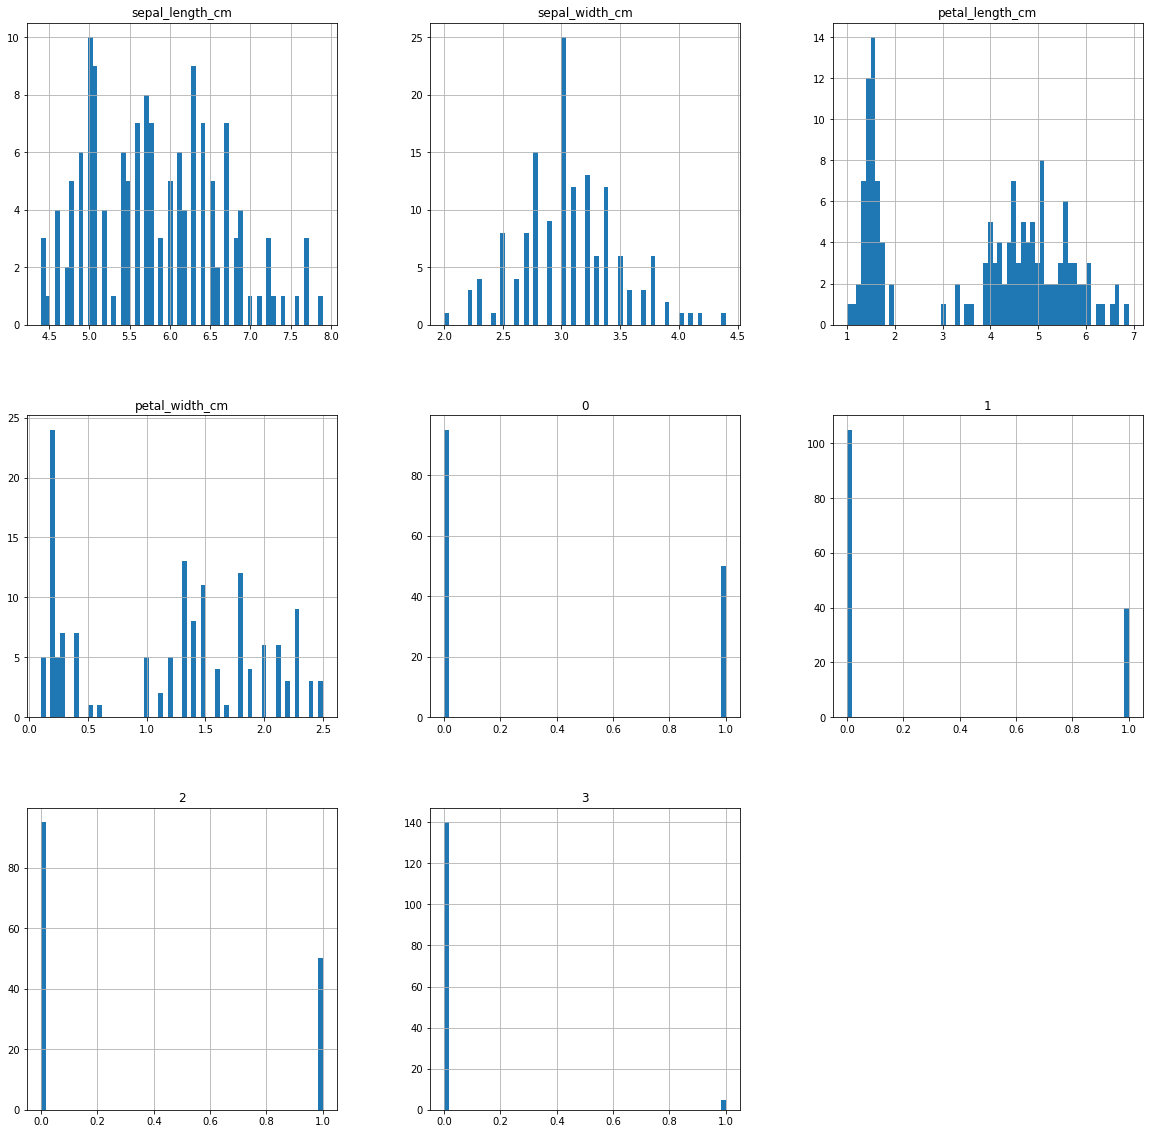

In [43]:
data.hist(bins=60, figsize=(20,20))
plt.show()

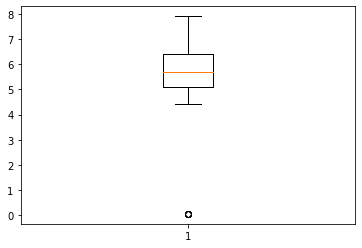

In [10]:
plt.boxplot(data['sepal_length_cm'])
plt.show()

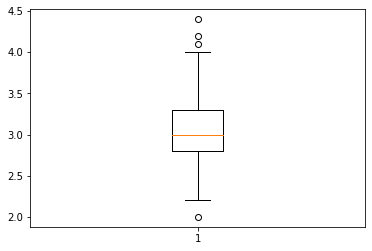

In [11]:
plt.boxplot(data['sepal_width_cm'])
plt.show()

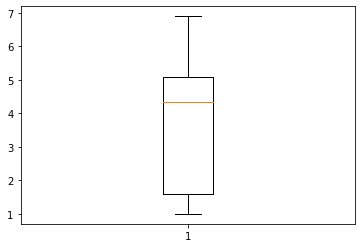

In [12]:
plt.boxplot(data['petal_length_cm'])
plt.show()

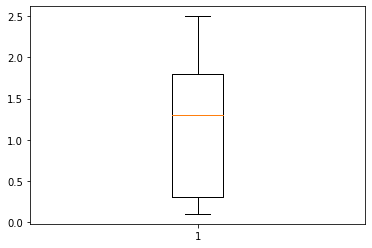

In [13]:
plt.boxplot(data['petal_width_cm'])
plt.show()

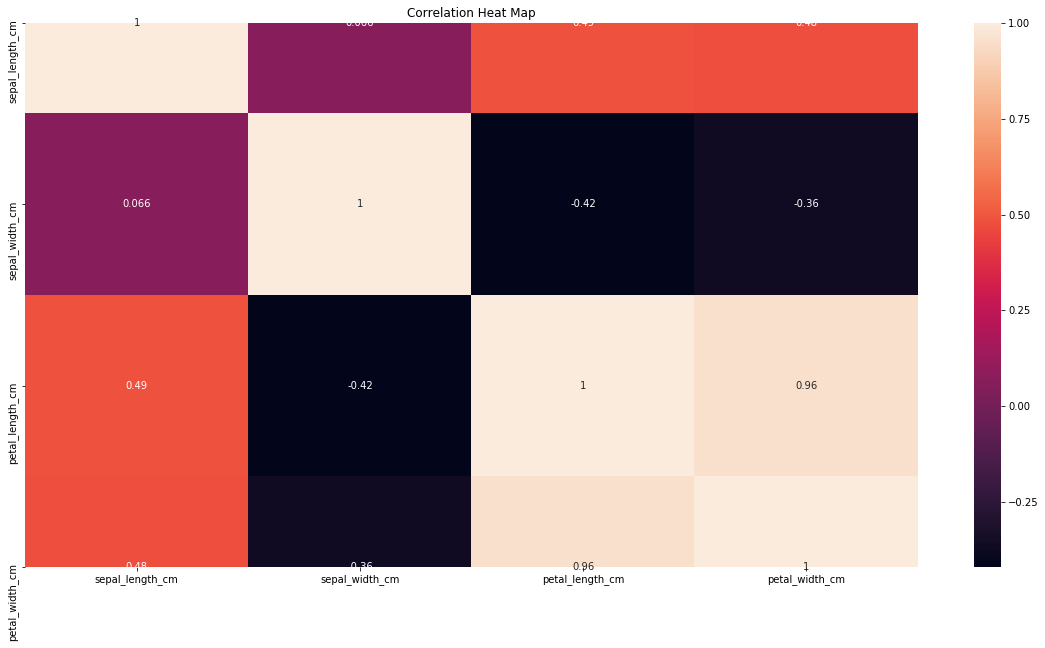

In [14]:
correlation = data.corr()
plt.figure(figsize=(20,10))
plt.title('Correlation Heat Map')
sns.heatmap(correlation,vmax=1,annot=True)